<a href="https://colab.research.google.com/github/albert-h-wong/DS-Sprint-02-Storytelling-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [5]:
print(df.tail())
df.head()

      Year GoogleKnowlege_Occupation     Show   Group                 Guest  \
2688  2015                biographer  7/29/15   Media  Doris Kearns Goodwin   
2689  2015                  director  7/30/15   Media          J. J. Abrams   
2690  2015         stand-up comedian   8/3/15  Comedy           Amy Schumer   
2691  2015                     actor   8/4/15  Acting           Denis Leary   
2692  2015                  comedian   8/5/15  Comedy            Louis C.K.   

                  Occupation  
2688                   Media  
2689                   Media  
2690  Acting, Comedy & Music  
2691  Acting, Comedy & Music  
2692  Acting, Comedy & Music  


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [8]:
df.shape

(2693, 6)

In [6]:
df.describe()

,Year
count,2693.000000
mean,2006.816190
std,4.828177
min,1999.000000
25%,2003.000000
50%,2007.000000
75%,2011.000000
max,2015.000000


In [10]:
df.dtypes

Year                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Guest                        object
Occupation                   object
dtype: object

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [11]:
pd.crosstab(df.Year, df.Occupation)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,150,2,11,3
2000,125,14,21,9
2001,114,6,31,6
2002,99,11,42,7
2003,93,17,41,15
2004,63,37,45,19
2005,60,26,54,22
2006,58,31,47,25
2007,36,24,47,34


In [12]:
pd.crosstab(df.Year, df.Occupation, margins=True, margins_name='Total')

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,Total
Year,,,,,
1999,150,2,11,3,166
2000,125,14,21,9,169
2001,114,6,31,6,157
2002,99,11,42,7,159
2003,93,17,41,15,166
2004,63,37,45,19,164
2005,60,26,54,22,162
2006,58,31,47,25,161
2007,36,24,47,34,141


In [97]:
ct_dailyshow = pd.crosstab(df.Year, df.Occupation, normalize='index')

ct_dailyshow

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


In [0]:
ct_dailyshow2 = ct_dailyshow.drop('Other', 1)


# Part 2 — Recreate this explanatory visualization:

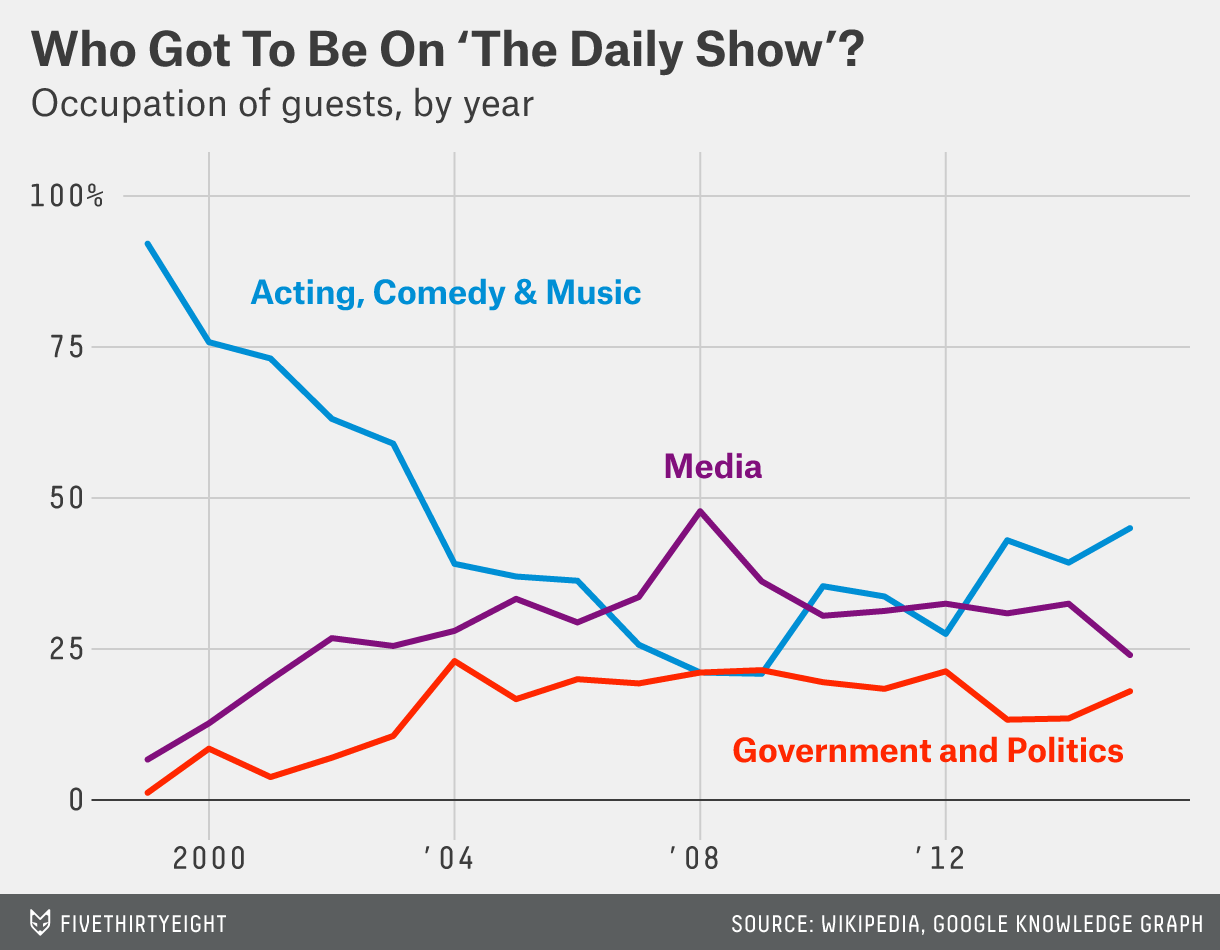

In [18]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [0]:
plt.style.use('fivethirtyeight')

In [25]:
guest_index = [ct_dailyshow['Acting, Comedy & Music'], ct_dailyshow['Government and Politics'], ct_dailyshow['Media']]
guest_index

[Year
 1999    0.903614
 2000    0.739645
 2001    0.726115
 2002    0.622642
 2003    0.560241
 2004    0.384146
 2005    0.370370
 2006    0.360248
 2007    0.255319
 2008    0.207317
 2009    0.208589
 2010    0.351515
 2011    0.337423
 2012    0.268293
 2013    0.427711
 2014    0.392638
 2015    0.450000
 Name: Acting, Comedy & Music, dtype: float64, Year
 1999    0.012048
 2000    0.082840
 2001    0.038217
 2002    0.069182
 2003    0.102410
 2004    0.225610
 2005    0.160494
 2006    0.192547
 2007    0.170213
 2008    0.201220
 2009    0.208589
 2010    0.181818
 2011    0.165644
 2012    0.201220
 2013    0.126506
 2014    0.128834
 2015    0.170000
 Name: Government and Politics, dtype: float64, Year
 1999    0.066265
 2000    0.124260
 2001    0.197452
 2002    0.264151
 2003    0.246988
 2004    0.274390
 2005    0.333333
 2006    0.291925
 2007    0.333333
 2008    0.469512
 2009    0.361963
 2010    0.303030
 2011    0.312883
 2012    0.317073
 2013    0.307229
 2014  

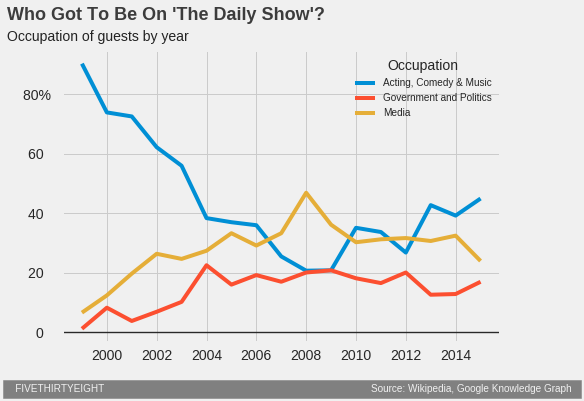

In [125]:
guest_chart = ct_dailyshow2.plot(figsize = (7,5));

guest_chart.tick_params(axis = 'both', which = 'major', labelsize = 14)

guest_chart.set_yticklabels(labels = [-20, '0   ', '20   ', '40   ', '60   ', '80% ', '100'])

guest_chart.axhline(y = 0, color = 'black', linewidth = 1.4, alpha = .8)

guest_chart.xaxis.label.set_visible(False)

guest_chart.text(x = 1996, y = -.2,
                s = '   FIVETHIRTYEIGHT                                                                                                 Source: Wikipedia, Google Knowledge Graph  ',
                fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

guest_chart.text(x = 1996, y = 1.05, s = "Who Got To Be On 'The Daily Show'?",
                 fontsize = 18, color='black', weight = 'bold', alpha = .75)
guest_chart.text(x = 1996, y=.98,
                s = 'Occupation of guests by year',
                fontsize = 14, color='black', alpha = .85);

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [0]:
guest_appearances = df['Guest'].value_counts()

In [71]:
guest_appearances

Fareed Zakaria                                             19
Denis Leary                                                17
Brian Williams                                             16
Paul Rudd                                                  13
Ricky Gervais                                              13
Tom Brokaw                                                 12
Bill O'Reilly                                              10
Will Ferrell                                               10
Reza Aslan                                                 10
Richard Lewis                                              10
Sarah Vowell                                                9
Mike Huckabee                                               8
Louis C.K.                                                  8
Adam Sandler                                                8
Maggie Gyllenhaal                                           8
Ben Affleck                                                 8
Samuel L

In [83]:
top_10_guests = guest_appearances >= 10

df['Guest_Appearances'] = guest_appearances

df.Guest_Appearances.dtypes


dtype('float64')

In [86]:
df['Guest_Appearances'] = df['Guest_Appearances'].dropna().apply(np.int64)

df['Guest_Appearances']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
2663   NaN
2664   NaN
2665   NaN
2666   NaN
2667   NaN
2668   NaN
2669   NaN
2670   NaN
2671   NaN
2672   NaN
2673   NaN
2674   NaN
2675   NaN
2676   NaN
2677   NaN
2678   NaN
2679   NaN
2680   NaN
2681   NaN
2682   NaN
2683   NaN
2684   NaN
2685   NaN
2686   NaN
2687   NaN
2688   NaN
2689   NaN
2690   NaN
2691   NaN
2692   NaN
Name: Guest_Appearances, Length: 2693, dtype: float64

In [0]:
top_10_guestlist = df.[(guest_appearances >= 10)]
df['Guest_Appearances'] = df['Guest'].apply(guest_appearances)

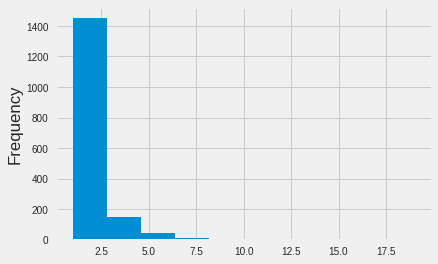

In [128]:
guest_appearances.plot(x=df['Guest'],kind='hist')

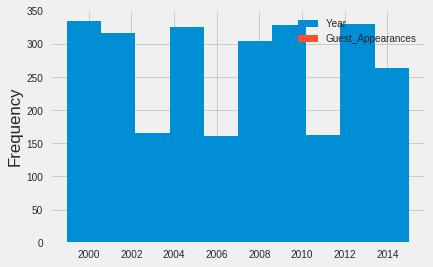

In [129]:
df.plot(x=df['Guest'],kind='hist')